In [5]:
array = [[10,20]]
array2 = [[10,20],[30,40]]

In [6]:
array[0][0]

10

In [7]:
array[1][0]

IndexError: list index out of range

In [18]:
import pandas as pd

In [19]:
data = pd.read_excel(r'C:\Users\thoma\Downloads\commerce_data.xlsx')

In [20]:
data = data.fillna(0)

In [24]:
k_data = data[['discount','sales']]

In [25]:
k_data = k_data.values

In [26]:
k_data

array([[2.9000e-01, 1.1700e+04],
       [4.4000e-01, 8.7000e+04],
       [4.7000e-01, 8.5400e+06],
       ...,
       [2.6000e-01, 1.1120e+05],
       [3.4000e-01, 1.2474e+05],
       [0.0000e+00, 1.9500e+05]])

In [32]:
from sklearn.cluster import KMeans

In [36]:
optimal_k = []

In [37]:
for i in range(2,11):
    k = KMeans(n_clusters = i, init='k-means++')
    k.fit(k_data)
    res = k.inertia_
    optimal_k.append(res)

C:\Users\thoma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\thoma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\thoma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\thoma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Win

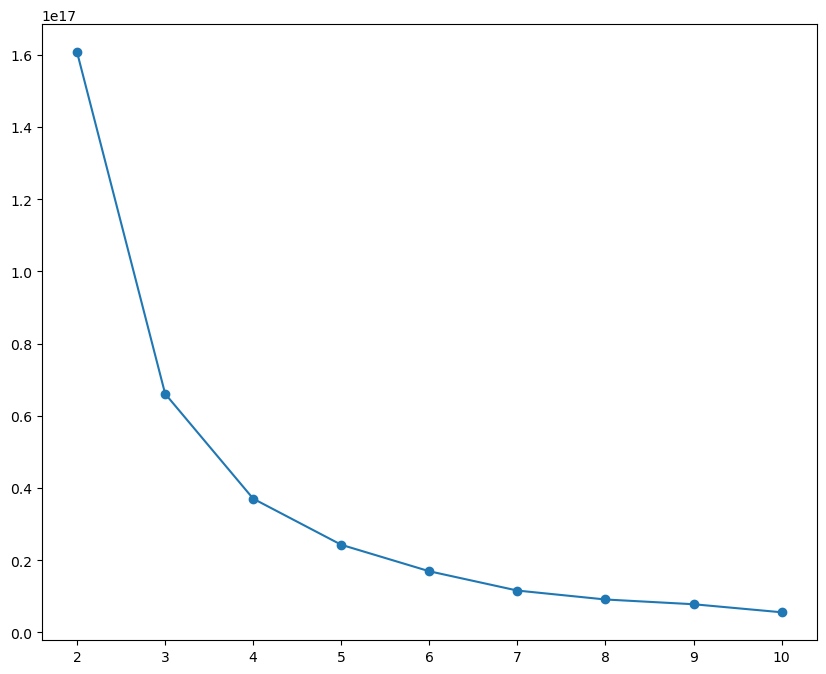

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(range(2,11), optimal_k,marker='o')
plt.show()

In [43]:
optimal_kmeans = KMeans(n_clusters = 6, init='k-means++')
optimal_kmeans.fit(k_data)


C:\Users\thoma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


KMeans(n_clusters=6)

In [44]:
cluster_prediction = optimal_kmeans.predict(k_data)

In [45]:
data

,product_price,discount,viewer,likes,sales
0,11700,0.29,650000,180000,11700
1,17400,0.44,650000,180000,87000
2,14000,0.47,650000,180000,8540000
3,29100,0.29,410000,18000,5063400
4,32000,0.00,350000,15000,1024000
...,...,...,...,...,...
2898,1590,0.27,1271,4509,19080
2899,1390,0.26,1271,4509,31970
2900,1390,0.26,1271,4509,111200
2901,990,0.34,1271,4509,124740


In [46]:
data['cluster'] = cluster_prediction

In [47]:
data

,product_price,discount,viewer,likes,sales,cluster
0,11700,0.29,650000,180000,11700,0
1,17400,0.44,650000,180000,87000,0
2,14000,0.47,650000,180000,8540000,5
3,29100,0.29,410000,18000,5063400,0
4,32000,0.00,350000,15000,1024000,0
...,...,...,...,...,...,...
2898,1590,0.27,1271,4509,19080,0
2899,1390,0.26,1271,4509,31970,0
2900,1390,0.26,1271,4509,111200,0
2901,990,0.34,1271,4509,124740,0
